# DEALING WITH INCORRECT DATA - Source Exercise Chatgpt




# **BIRDS**

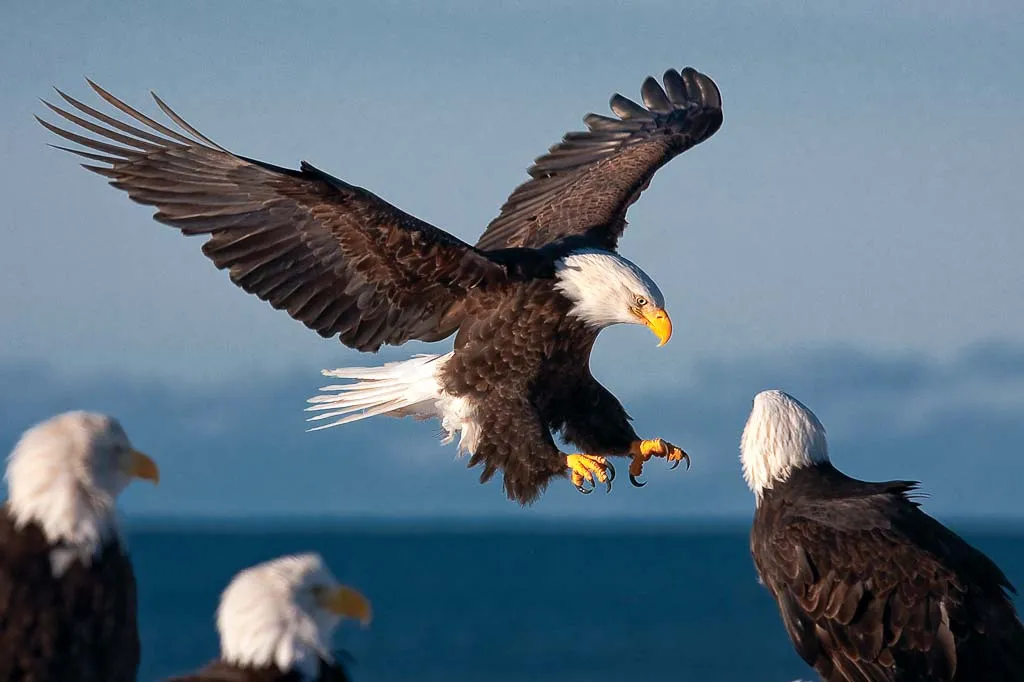

	1.	Incorrect Data Types:
	•	Convert average_wingspan_cm in the birds.csv to a numerical type (remove units like “cm”).
	•	Convert years_experience in the biologists.csv to integer, filling any missing values with the average.

	2.	Missing and Inconsistent Data:
	•	Check for missing values in location and time_spent_min in observations.csv.
	•	Fill missing location values with “Unknown” and missing time_spent_min with the average observation time.
	•	Ensure all date_observed values are in a consistent date format.

	3.	Standardize Categorical Data:
	•	Standardize specialization in biologists.csv (e.g., fix typos like “ornitology” to “ornithology”).
	•	In birds.csv, ensure color values are lowercase and remove any leading or trailing spaces.

	4.  Check for duplicates in Observations

	5.	Aggregation:
	•	Aggregate number of bird counts per bird ID.




---



# **1. Incorrect** Data Types:


<font color="red"><b>Convert average_wingspan_cm in the birds.csv to a numerical type (remove units like “cm”)</b></font>

In [78]:
path_birds = '/content/birds.csv'

In [79]:
import pandas as pd

In [80]:
birds = pd.read_csv (path_birds)

In [81]:
display (birds.head(10))

,bird_id,species,color,average_wingspan_cm
0,101,American Robin,Red,40 cm
1,102,Bald Eagle,White,220
2,103,Peregrine Falcon,Gray,100
3,104,Northern Cardinal,Red,12.5 cm
4,105,Blue Jay,blue,30


In [82]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bird_id              5 non-null      int64 
 1   species              5 non-null      object
 2   color                5 non-null      object
 3   average_wingspan_cm  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes


In [83]:
birds['average_wingspan_cm'] = pd.to_numeric(birds['average_wingspan_cm'].str.strip('cm')).astype(int)


In [84]:
display (birds.head(10))

,bird_id,species,color,average_wingspan_cm
0,101,American Robin,Red,40
1,102,Bald Eagle,White,220
2,103,Peregrine Falcon,Gray,100
3,104,Northern Cardinal,Red,12
4,105,Blue Jay,blue,30


<font color="red"><b>Convert years_experience in the biologists.csv to integer, filling any missing values with the average</b></font>

In [158]:
path_biologists= '/content/biologists.csv'

In [159]:
biologists = pd.read_csv (path_biologists)

In [160]:
display (biologists)

,biologist_id,name,specialization,years_experience,birth_year
0,1,Alice Smith,Ornithology,10.0,1980
1,2,Bob Johnson,ecology,15.0,1975
2,3,Catherine Lee,ornitology,NaN,1988
3,4,David Nguyen,Ecology,5.0,1990
4,5,Emily Davis,ornithology,20.0,1985


In [161]:
biologists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   biologist_id      5 non-null      int64  
 1   name              5 non-null      object 
 2   specialization    5 non-null      object 
 3   years_experience  4 non-null      float64
 4   birth_year        5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [162]:

# Calculate the average of years_experience, ignoring NaN values
average_experience = biologists['years_experience'].mean()

# Fill missing values with the calculated average and convert to integer
biologists['years_experience'] = biologists['years_experience'].fillna(average_experience).astype(int)

# Display the updated DataFrame to verify changes
print(biologists)

   biologist_id           name specialization  years_experience  birth_year
0             1    Alice Smith    Ornithology                10        1980
1             2    Bob Johnson        ecology                15        1975
2             3  Catherine Lee     ornitology                12        1988
3             4   David Nguyen        Ecology                 5        1990
4             5    Emily Davis    ornithology                20        1985




---



#  2. Missing and Inconsistent Data:

<font color="red"><b>Check for missing values in location and time_spent_min in observations.csv</b></font>

In [186]:
display (observations)

,observation_id,biologist_id,bird_id,location,date_observed,time_spent_min,bird_count,parsed_date_observed
0,1001,1,101,Yellowstone Park,2024-01-15,30.000000,2,15/01/2024
1,1002,2,102,Yosemite Park,01-20-2024,45.000000,1,20/01/2024
2,1003,3,103,Unknown,2024/02/10,20.000000,5,10/02/2024
3,1004,1,104,Yellowstone Park,"March 5, 2024",15.000000,3,05/03/2024
4,1005,4,105,Grand Canyon,2024-03-10,30.714286,2,10/03/2024
5,1006,5,101,Unknown,2024-03-15,60.000000,4,15/03/2024
6,1007,2,104,Yosemite Park,2024-04-01,25.000000,3,01/04/2024
7,1008,3,105,Yellowstone Park,"April 2, 2024",20.000000,1,02/04/2024


In [165]:
missing_values = observations[['location', 'time_spent_min']].isna().sum()


In [166]:
Nan = observations[['location', 'time_spent_min']].isna()

In [167]:
missing_values

,0
location,1
time_spent_min,1


In [168]:
display (Nan)

,location,time_spent_min
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True
5,False,False
6,False,False
7,False,False


In [169]:
nan_rows = observations[observations[['location', 'time_spent_min']].isna().any(axis=1)]


In [170]:
display (nan_rows)

,observation_id,biologist_id,bird_id,location,date_observed,time_spent_min,bird_count
2,1003,3,103,NaN,2024/02/10,20.0,5
4,1005,4,105,Grand Canyon,2024-03-10,NaN,2


<font color="red"><b>Filling missing location values with “Unknown” and missing time_spent_min with the average observation time</b></font>




In [171]:
observations['location'] = observations['location'].fillna('Unknown')

In [172]:
display (observations)

,observation_id,biologist_id,bird_id,location,date_observed,time_spent_min,bird_count
0,1001,1,101,Yellowstone Park,2024-01-15,30.0,2
1,1002,2,102,Yosemite Park,01-20-2024,45.0,1
2,1003,3,103,Unknown,2024/02/10,20.0,5
3,1004,1,104,Yellowstone Park,"March 5, 2024",15.0,3
4,1005,4,105,Grand Canyon,2024-03-10,NaN,2
5,1006,5,101,Unknown,2024-03-15,60.0,4
6,1007,2,104,Yosemite Park,2024-04-01,25.0,3
7,1008,3,105,Yellowstone Park,"April 2, 2024",20.0,1


In [173]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   observation_id  8 non-null      int64  
 1   biologist_id    8 non-null      int64  
 2   bird_id         8 non-null      int64  
 3   location        8 non-null      object 
 4   date_observed   8 non-null      object 
 5   time_spent_min  7 non-null      float64
 6   bird_count      8 non-null      int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 576.0+ bytes


In [174]:
observations['time_spent_min'] = pd.to_numeric(observations['time_spent_min'], errors='coerce')


In [175]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   observation_id  8 non-null      int64  
 1   biologist_id    8 non-null      int64  
 2   bird_id         8 non-null      int64  
 3   location        8 non-null      object 
 4   date_observed   8 non-null      object 
 5   time_spent_min  7 non-null      float64
 6   bird_count      8 non-null      int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 576.0+ bytes


In [188]:
average_time_spent = observations['time_spent_min'].mean()
print(average_time_spent)


30.714285714285715


In [177]:
display (observations)

,observation_id,biologist_id,bird_id,location,date_observed,time_spent_min,bird_count
0,1001,1,101,Yellowstone Park,2024-01-15,30.0,2
1,1002,2,102,Yosemite Park,01-20-2024,45.0,1
2,1003,3,103,Unknown,2024/02/10,20.0,5
3,1004,1,104,Yellowstone Park,"March 5, 2024",15.0,3
4,1005,4,105,Grand Canyon,2024-03-10,NaN,2
5,1006,5,101,Unknown,2024-03-15,60.0,4
6,1007,2,104,Yosemite Park,2024-04-01,25.0,3
7,1008,3,105,Yellowstone Park,"April 2, 2024",20.0,1


In [187]:
observations['time_spent_min'] = observations['time_spent_min'].fillna(average_time_spent)

In [179]:
display (observations)

,observation_id,biologist_id,bird_id,location,date_observed,time_spent_min,bird_count
0,1001,1,101,Yellowstone Park,2024-01-15,30.000000,2
1,1002,2,102,Yosemite Park,01-20-2024,45.000000,1
2,1003,3,103,Unknown,2024/02/10,20.000000,5
3,1004,1,104,Yellowstone Park,"March 5, 2024",15.000000,3
4,1005,4,105,Grand Canyon,2024-03-10,30.714286,2
5,1006,5,101,Unknown,2024-03-15,60.000000,4
6,1007,2,104,Yosemite Park,2024-04-01,25.000000,3
7,1008,3,105,Yellowstone Park,"April 2, 2024",20.000000,1


<font color="red"><b>Ensure all date_observed values
are in a consistent date format</b></font>





In [183]:
from dateutil import parser

# Function to parse dates in various formats, returning NaT if unable to parse
def parse_date(date):
    try:
        return parser.parse(date)
    except (ValueError, TypeError):
        return pd.NaT

# Apply the function to create a new column 'parsed_date_observed'
observations['parsed_date_observed'] = observations['date_observed'].apply(parse_date)

# Format 'parsed_date_observed' as day/month/year
observations['parsed_date_observed'] = observations['parsed_date_observed'].dt.strftime('%d/%m/%Y')

# Display the DataFrame to check the original and new parsed date columns
display(observations[['observation_id', 'date_observed', 'parsed_date_observed']])

,observation_id,date_observed,parsed_date_observed
0,1001,2024-01-15,15/01/2024
1,1002,01-20-2024,20/01/2024
2,1003,2024/02/10,10/02/2024
3,1004,"March 5, 2024",05/03/2024
4,1005,2024-03-10,10/03/2024
5,1006,2024-03-15,15/03/2024
6,1007,2024-04-01,01/04/2024
7,1008,"April 2, 2024",02/04/2024


In [184]:
display (observations)

,observation_id,biologist_id,bird_id,location,date_observed,time_spent_min,bird_count,parsed_date_observed
0,1001,1,101,Yellowstone Park,2024-01-15,30.000000,2,15/01/2024
1,1002,2,102,Yosemite Park,01-20-2024,45.000000,1,20/01/2024
2,1003,3,103,Unknown,2024/02/10,20.000000,5,10/02/2024
3,1004,1,104,Yellowstone Park,"March 5, 2024",15.000000,3,05/03/2024
4,1005,4,105,Grand Canyon,2024-03-10,30.714286,2,10/03/2024
5,1006,5,101,Unknown,2024-03-15,60.000000,4,15/03/2024
6,1007,2,104,Yosemite Park,2024-04-01,25.000000,3,01/04/2024
7,1008,3,105,Yellowstone Park,"April 2, 2024",20.000000,1,02/04/2024


In [191]:
observations = observations.drop('date_observed', axis=1)

In [192]:
display (observations)

,observation_id,biologist_id,bird_id,location,time_spent_min,bird_count,parsed_date_observed
0,1001,1,101,Yellowstone Park,30.000000,2,15/01/2024
1,1002,2,102,Yosemite Park,45.000000,1,20/01/2024
2,1003,3,103,Unknown,20.000000,5,10/02/2024
3,1004,1,104,Yellowstone Park,15.000000,3,05/03/2024
4,1005,4,105,Grand Canyon,30.714286,2,10/03/2024
5,1006,5,101,Unknown,60.000000,4,15/03/2024
6,1007,2,104,Yosemite Park,25.000000,3,01/04/2024
7,1008,3,105,Yellowstone Park,20.000000,1,02/04/2024


# 3.  Standardize Categorical Data:

<font color="red">Standardize specialization in biologists.:csv (e.g., fix typos like “ornitology” to “ornithology”)</font>



In [194]:
display (biologists)

,biologist_id,name,specialization,years_experience,birth_year
0,1,Alice Smith,Ornithology,10,1980
1,2,Bob Johnson,ecology,15,1975
2,3,Catherine Lee,ornitology,12,1988
3,4,David Nguyen,Ecology,5,1990
4,5,Emily Davis,ornithology,20,1985


In [200]:
biologists['specialization'] = biologists['specialization'].str.lower()

In [206]:
display (biologists['specialization'])

,specialization
0,ornithology
1,ecology
2,ornitology
3,ecology
4,ornithology


In [211]:
biologists ['specialization'] = biologists ['specialization'].replace ({'ornitology': 'ornithology'})


In [212]:
display (biologists ['specialization'])

,specialization
0,ornithology
1,ecology
2,ornithology
3,ecology
4,ornithology


# 4. Check for Duplicates



<font color="red"><b>Remove duplicate records in observations.csv based on observation_id</b></font>


In [219]:
display (observations)

,observation_id,biologist_id,bird_id,location,time_spent_min,bird_count,parsed_date_observed
0,1001,1,101,Yellowstone Park,30.000000,2,15/01/2024
1,1002,2,102,Yosemite Park,45.000000,1,20/01/2024
2,1003,3,103,Unknown,20.000000,5,10/02/2024
3,1004,1,104,Yellowstone Park,15.000000,3,05/03/2024
4,1005,4,105,Grand Canyon,30.714286,2,10/03/2024
5,1006,5,101,Unknown,60.000000,4,15/03/2024
6,1007,2,104,Yosemite Park,25.000000,3,01/04/2024
7,1008,3,105,Yellowstone Park,20.000000,1,02/04/2024


In [230]:
duplicates = observations.duplicated(subset=['observation_id'])

In [231]:
duplicates

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False


#    Aggregation and Cleaning with Assertions:

\
<font color="red"><b>Aggregate number of bird counts per bird ID.</b></font>


In [235]:
display(observations)

,observation_id,biologist_id,bird_id,location,time_spent_min,bird_count,parsed_date_observed
0,1001,1,101,Yellowstone Park,30.000000,2,15/01/2024
1,1002,2,102,Yosemite Park,45.000000,1,20/01/2024
2,1003,3,103,Unknown,20.000000,5,10/02/2024
3,1004,1,104,Yellowstone Park,15.000000,3,05/03/2024
4,1005,4,105,Grand Canyon,30.714286,2,10/03/2024
5,1006,5,101,Unknown,60.000000,4,15/03/2024
6,1007,2,104,Yosemite Park,25.000000,3,01/04/2024
7,1008,3,105,Yellowstone Park,20.000000,1,02/04/2024


In [241]:
total_bird_count_by_id = observations.groupby('bird_id')['bird_count'].sum().reset_index()


In [242]:
print (total_bird_count_by_id)

   bird_id  bird_count
0      101           6
1      102           1
2      103           5
3      104           6
4      105           3
